In [26]:
#Loading NLTK
import nltk

In [27]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [28]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [29]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)


<FreqDist with 25 samples and 30 outcomes>


In [30]:
fdist.most_common(2)

[('is', 3), (',', 2)]

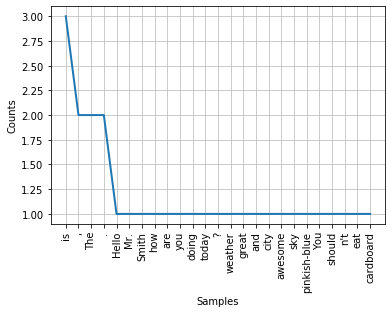

In [31]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()


In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ubuntuk/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'are', "it's", 'as', 'haven', "you'll", "shouldn't", 'no', "isn't", 'does', 'me', 'should', 'any', 'now', 'some', 'why', 'wasn', 'were', 'doing', 'such', 'own', "wouldn't", 'what', 'on', 'itself', 'further', 'hasn', "didn't", 'my', 'am', 'nor', 'the', 'just', 'because', 'm', 'won', 'them', "you're", 'was', 'about', 'so', 'more', 'o', 'above', 'ourselves', 'not', 'will', 're', 'mustn', 'isn', 'll', 'being', 'after', 'where', 'few', 'those', 'too', "mustn't", 'this', 'of', 'before', "aren't", 'his', "hadn't", 'below', 'each', 'than', 'to', 'same', 'aren', 'yours', 'against', 'can', 'your', 'if', 'didn', 'whom', 'through', "wasn't", 'herself', "you've", 'both', 'y', 'couldn', 'very', 'into', 'has', 'having', "that'll", 'weren', 'from', 'her', 'in', 'who', 'mightn', 'd', 'she', 'over', 'have', 'they', 'shan', 'myself', 'at', "don't", 'between', "won't", 'it', 'ours', 'himself', 'off', 'other', 'ma', 'needn', 'hers', 'a', 'down', 'then', 'don', "you'd", "couldn't", 'out', 'had', 'during', 

In [35]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))


Lemmatized Word: fly
Stemmed Word: fli


In [36]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

In [37]:
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [38]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

In [39]:
# Import pandas
import pandas as pd

In [40]:
data=pd.read_csv('train.tsv', sep='\t')

In [41]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [43]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

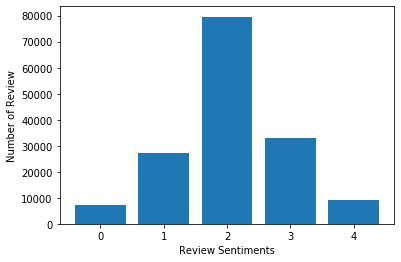

In [44]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

In [47]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.6049169122986885


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.5865265496176684
